# Task

Explore the nyc-taxi CSV dataset from Kaggle. Clean the data by introducing dummy variables where necessary and decide how to treat nulls and outliers. Decide whether bucketing may be helpful for selected columns. Use Exploratory Data Analysis to investigate correlation and identify the best features to include in a model. Use linear regression to predict the price of a taxi journey with given features. Calculate RMSE.

In [1]:
#Read in the file using pandas
import pandas as pd

In [2]:
df = pd.read_csv("nyc-taxi.csv")
df.head()

,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,normalizeHolidayName,isPaidTimeOff,snowDepth,precipTime,precipDepth,temperature,totalAmount
0,1.0,9.40,15,2,1,None,False,29.058824,24.0,3.0,6.185714,44.30
1,NaN,14.75,13,4,1,None,False,0.000000,6.0,0.0,4.571930,44.80
2,1.0,3.35,23,4,1,None,False,0.000000,1.0,0.0,4.384091,18.96
3,1.0,3.33,18,2,1,None,False,29.058824,24.0,3.0,6.185714,16.30
4,1.0,0.47,17,6,1,None,False,0.000000,1.0,0.0,3.846429,5.30


Use the info function to see the features of our data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11734 entries, 0 to 11733
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   passengerCount        11147 non-null  float64
 1   tripDistance          11734 non-null  float64
 2   hour_of_day           11734 non-null  int64  
 3   day_of_week           11734 non-null  int64  
 4   month_num             11734 non-null  int64  
 5   normalizeHolidayName  11734 non-null  object 
 6   isPaidTimeOff         11734 non-null  bool   
 7   snowDepth             11734 non-null  float64
 8   precipTime            11734 non-null  float64
 9   precipDepth           11734 non-null  float64
 10  temperature           11734 non-null  float64
 11  totalAmount           11617 non-null  float64
dtypes: bool(1), float64(7), int64(3), object(1)
memory usage: 1020.0+ KB


We have 12 columns and 11734 rows. Most of the columns are numerical in value, except one string and one boolean. It looks like we have some null values in passengerCount and totalAmount. Let's check how many.

In [4]:
df.isna().sum()

passengerCount          587
tripDistance              0
hour_of_day               0
day_of_week               0
month_num                 0
normalizeHolidayName      0
isPaidTimeOff             0
snowDepth                 0
precipTime                0
precipDepth               0
temperature               0
totalAmount             117
dtype: int64

We have 587 nulls in passengerCount and 117 nulls in totalAmount. Since we are trying to predict the totalAmount of a journey we should drop the rows that have null totalAmount. The problem with filling nulls with another value e.g mean is that totalAmount is what I'm trying to predict and my model will then include totalAmount values that aren't real. 

Before I drop the rows that have null values I need to decide how to treat the null values in passengerCount. My first idea is to replace the nulls in passengerCount with the mean of the column - let's see what that mean is first.

In [5]:
df.describe()

,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,snowDepth,precipTime,precipDepth,temperature,totalAmount
count,11147.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11617.000000
mean,1.348704,2.866139,13.633884,3.223879,3.502898,1.609015,12.028379,190.782342,10.314244,14.724534
std,1.015296,2.905810,6.670530,1.961855,1.707729,7.146771,10.158597,1211.087724,8.500600,10.966517
min,1.000000,0.010000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-13.379464,3.300000
25%,1.000000,1.060000,9.000000,2.000000,2.000000,0.000000,1.000000,0.000000,3.566372,8.150000
50%,1.000000,1.900000,15.000000,3.000000,4.000000,0.000000,6.000000,3.000000,10.318229,11.300000
75%,1.000000,3.620000,19.000000,5.000000,5.000000,0.000000,24.000000,41.000000,17.239744,17.800000
max,6.000000,62.550000,23.000000,6.000000,6.000000,67.090909,24.000000,9999.000000,26.524107,339.380000


The mean looks like it's being skewed by extreme values because at least 75% of the journeys only had one passenger but the maximum is 6. Maybe I should replace null values with the mode instead? Let's look at the distribution of passenger count. 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

C:\Users\44784\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passengerCount'>

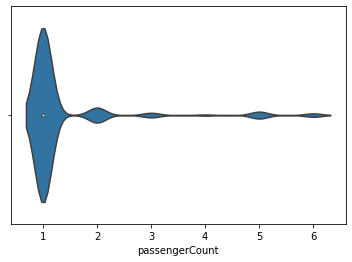

In [7]:
sns.violinplot(df['passengerCount'])

From this diagram I think it's best to replace null values with mode or median (which are the same in this case). 

In [8]:
df['passengerCount'] = df['passengerCount'].fillna(df['passengerCount'].median())

In [9]:
df.isna().sum()

passengerCount            0
tripDistance              0
hour_of_day               0
day_of_week               0
month_num                 0
normalizeHolidayName      0
isPaidTimeOff             0
snowDepth                 0
precipTime                0
precipDepth               0
temperature               0
totalAmount             117
dtype: int64

Now let's remove the null totalAmount.

In [10]:
df = df.dropna(axis=0)

In [11]:
df.isna().any()

passengerCount          False
tripDistance            False
hour_of_day             False
day_of_week             False
month_num               False
normalizeHolidayName    False
isPaidTimeOff           False
snowDepth               False
precipTime              False
precipDepth             False
temperature             False
totalAmount             False
dtype: bool

The columns that could have outliers are tripDistance, snowDepth, precipDepth and temperature. Let's visualize the distributions.

C:\Users\44784\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temperature'>

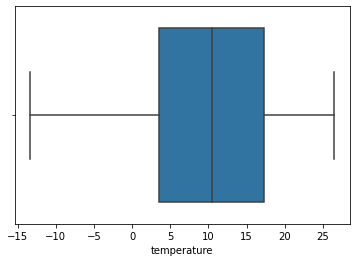

In [12]:
sns.boxplot(df['temperature'])

There are no outliers in the temperature column. 

C:\Users\44784\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tripDistance'>

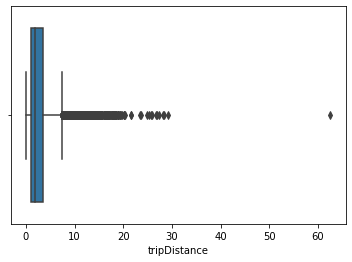

In [13]:
sns.boxplot(df['tripDistance'])

There are outliers in tripDistance but the values are feasible. Also, I suspect that tripDistance will have a large impact on the cost of the taxi journey so it wouldn't be good practice to remove these outlier values.

C:\Users\44784\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='snowDepth'>

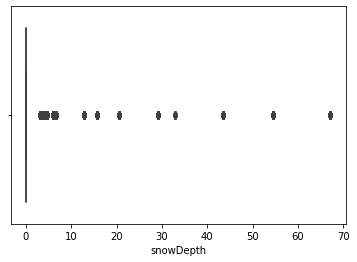

In [14]:
sns.boxplot(df['snowDepth'])

C:\Users\44784\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='precipDepth'>

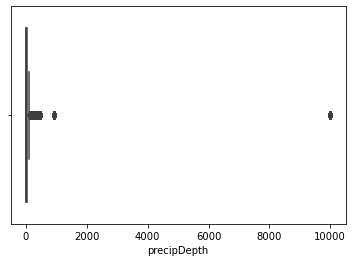

In [15]:
sns.boxplot(df['precipDepth'])

SnowDepth and precipDepth both have outliers. It looks like most of the taxi journeys took place when there was very little snow or rain. Revisiting the describe table we see that at least 75% of journeys had 0 snowDepth and 50% of journeys had less than 3 for precipDepth (with 75% having less than 41). The SnowDepth values seem feasible but there's at least one precipDepth which doesn't look feasible. Revisiting the max from the describe table we see the max is 9999 which is likely to be a mistake in the data. From the box plot above we can safely remove precipDepth values larger than 2000.


In [16]:
df = df[df.precipDepth < 2000]

In [17]:
df.describe()

,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,snowDepth,precipTime,precipDepth,temperature,totalAmount
count,11443.000000,11443.000000,11443.000000,11443.000000,11443.000000,11443.000000,11443.000000,11443.000000,11443.000000,11443.000000
mean,1.329809,2.864420,13.625797,3.241807,3.525911,1.548324,11.839290,42.330595,10.450916,14.735764
std,0.990397,2.903323,6.668425,1.958669,1.710448,7.126919,10.125465,101.622760,8.464854,10.985572
min,1.000000,0.010000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-13.379464,3.300000
25%,1.000000,1.070000,9.000000,2.000000,2.000000,0.000000,1.000000,0.000000,3.579464,8.150000
50%,1.000000,1.900000,15.000000,3.000000,4.000000,0.000000,6.000000,3.000000,10.483240,11.300000
75%,1.000000,3.620000,19.000000,5.000000,5.000000,0.000000,24.000000,41.000000,17.239744,17.800000
max,6.000000,62.550000,23.000000,6.000000,6.000000,67.090909,24.000000,909.000000,26.524107,339.380000


Let's look at implementing buckets for hour of day. I think 4 buckets is a sensible amount, 0-5, 6-11, 12-17, 18-23. These buckets would join together hours that are more/less likely to contain taxi journeys. For example, not many people would use a taxi between 0 and 5am but more would in the early morning rushhour covered by 6-11am. 

In [18]:
bins = [-1, 5, 11, 17, 23]
labels =[1,2,3,4]
df['timeofday'] = pd.cut(df['hour_of_day'], bins ,labels=labels)
df.sample(5)


,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,normalizeHolidayName,isPaidTimeOff,snowDepth,precipTime,precipDepth,temperature,totalAmount,timeofday
7431,1.0,4.52,23,5,4,None,False,0.0,1.0,0.0,11.264602,16.3,4
792,1.0,2.40,23,4,1,None,False,0.0,1.0,0.0,-2.999107,13.0,4
10075,1.0,2.11,18,2,6,None,False,0.0,24.0,90.0,16.966923,12.3,4
3493,1.0,1.60,18,6,2,None,False,0.0,6.0,909.0,-13.379464,9.8,4
11278,1.0,1.80,9,1,6,None,False,0.0,24.0,140.0,22.294330,9.8,2


Because 1,2,3,4 doesn't make sense for timeofday I need to use dummy variables. 

In [19]:
timeofday_dummies = pd.get_dummies(df.timeofday, prefix='timeofday')

timeofday_dummies.sample(n=4, random_state=1)

,timeofday_1,timeofday_2,timeofday_3,timeofday_4
8767,1,0,0,0
10209,0,1,0,0
11091,0,0,0,1
1152,0,0,1,0


Concatenating the new dummy variables to my dataframe. 

In [20]:
df_new = pd.concat([df, timeofday_dummies], axis=1)

df_new.sample(n=5, random_state=1)

,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,normalizeHolidayName,isPaidTimeOff,snowDepth,precipTime,precipDepth,temperature,totalAmount,timeofday,timeofday_1,timeofday_2,timeofday_3,timeofday_4
8767,1.0,0.80,2,5,5,None,False,0.000000,6.0,13.0,15.919643,8.15,1,1,0,0,0
10209,1.0,5.20,9,1,6,None,False,0.000000,6.0,0.0,26.524107,36.95,2,0,1,0,0
11091,5.0,1.66,20,4,6,None,False,0.000000,1.0,0.0,23.871429,9.30,4,0,0,0,1
1152,1.0,1.70,12,3,1,None,False,20.470588,1.0,0.0,2.003571,9.80,3,0,0,1,0
8588,1.0,1.47,3,6,5,None,False,0.000000,6.0,0.0,12.714545,8.30,1,1,0,0,0


month_num and day_of_week also need to be dummy encoded...

In [21]:
month_num_dummies = pd.get_dummies(df.month_num, prefix='month_num')

month_num_dummies.sample(n=5, random_state=1)

,month_num_1,month_num_2,month_num_3,month_num_4,month_num_5,month_num_6
8767,0,0,0,0,1,0
10209,0,0,0,0,0,1
11091,0,0,0,0,0,1
1152,1,0,0,0,0,0
8588,0,0,0,0,1,0


In [22]:
df_new2 = pd.concat([df_new, month_num_dummies], axis=1)

df_new2.sample(n=5, random_state=1)

,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,normalizeHolidayName,isPaidTimeOff,snowDepth,precipTime,precipDepth,...,timeofday_1,timeofday_2,timeofday_3,timeofday_4,month_num_1,month_num_2,month_num_3,month_num_4,month_num_5,month_num_6
8767,1.0,0.80,2,5,5,None,False,0.000000,6.0,13.0,...,1,0,0,0,0,0,0,0,1,0
10209,1.0,5.20,9,1,6,None,False,0.000000,6.0,0.0,...,0,1,0,0,0,0,0,0,0,1
11091,5.0,1.66,20,4,6,None,False,0.000000,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1152,1.0,1.70,12,3,1,None,False,20.470588,1.0,0.0,...,0,0,1,0,1,0,0,0,0,0
8588,1.0,1.47,3,6,5,None,False,0.000000,6.0,0.0,...,1,0,0,0,0,0,0,0,1,0


In [23]:
day_of_week_dummies = pd.get_dummies(df.day_of_week, prefix='day_of_week')

day_of_week_dummies.sample(n=5, random_state=1)

,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
8767,0,0,0,0,0,1,0
10209,0,1,0,0,0,0,0
11091,0,0,0,0,1,0,0
1152,0,0,0,1,0,0,0
8588,0,0,0,0,0,0,1


In [24]:
df_new3 = pd.concat([df_new2, day_of_week_dummies], axis=1)

df_new3.sample(n=5, random_state=1)

,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,normalizeHolidayName,isPaidTimeOff,snowDepth,precipTime,precipDepth,...,month_num_4,month_num_5,month_num_6,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
8767,1.0,0.80,2,5,5,None,False,0.000000,6.0,13.0,...,0,1,0,0,0,0,0,0,1,0
10209,1.0,5.20,9,1,6,None,False,0.000000,6.0,0.0,...,0,0,1,0,1,0,0,0,0,0
11091,5.0,1.66,20,4,6,None,False,0.000000,1.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1152,1.0,1.70,12,3,1,None,False,20.470588,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
8588,1.0,1.47,3,6,5,None,False,0.000000,6.0,0.0,...,0,1,0,0,0,0,0,0,0,1


Now that I've introduced dummy variables I need to drop the columns that contain the original variables.

In [25]:
df_new3.drop(columns=['hour_of_day', 'day_of_week', 'month_num', 'timeofday'], inplace=True)

Now I need to look at correlation between features and the label to decide which columns to include in the model. I suspect that the isPaidTimeOff column (related to normalizeHolidayName) will not have many True values because there aren't many public holidays in a year. Let's check using value_counts. 

In [26]:
df_new3['isPaidTimeOff'].value_counts()

False    11246
True       197
Name: isPaidTimeOff, dtype: int64

True values only account for around 2% of data so I don't think this column (or normalizeHolidayName) should be included in the model. 

In [27]:
df_new3.drop(columns=['normalizeHolidayName', 'isPaidTimeOff'], inplace=True)

Let's look at the correlations of features vs label.

In [28]:
df_new3.corr()

,passengerCount,tripDistance,snowDepth,precipTime,precipDepth,temperature,totalAmount,timeofday_1,timeofday_2,timeofday_3,...,month_num_4,month_num_5,month_num_6,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
passengerCount,1.000000,0.008862,0.002622,0.005669,0.017055,0.001288,0.012640,0.026819,-0.034560,-0.008051,...,0.000818,-0.014987,0.012194,-0.003991,-0.022186,-0.010575,-0.018531,-0.005085,0.028329,0.027086
tripDistance,0.008862,1.000000,0.010437,-0.001520,-0.004620,0.017783,0.912201,0.038677,0.045335,-0.024786,...,-0.004082,0.014227,0.000703,-0.002334,-0.019839,-0.000027,-0.012611,-0.014791,0.021083,0.025494
snowDepth,0.002622,0.010437,1.000000,0.013795,0.059987,-0.228651,0.012498,-0.025104,-0.004492,0.028983,...,-0.097859,-0.098346,-0.098102,0.085825,0.032915,-0.009331,-0.027732,-0.045095,-0.027992,0.005001
precipTime,0.005669,-0.001520,0.013795,1.000000,0.344477,0.053792,0.005123,-0.007286,-0.006611,0.005026,...,0.077313,0.112292,-0.026499,0.054689,0.063530,0.016640,-0.084672,-0.050168,0.033917,-0.023677
precipDepth,0.017055,-0.004620,0.059987,0.344477,1.000000,-0.113465,-0.009500,0.002090,-0.007741,0.006404,...,-0.053861,0.021157,-0.014692,0.077131,-0.005651,-0.006482,-0.020880,-0.118456,-0.072722,0.161096
temperature,0.001288,0.017783,-0.228651,0.053792,-0.113465,1.000000,0.021234,0.006155,0.004071,0.003790,...,0.034184,0.305843,0.615413,-0.009405,-0.025680,0.028943,0.005676,0.013522,-0.007329,-0.007585
totalAmount,0.012640,0.912201,0.012498,0.005123,-0.009500,0.021234,1.000000,-0.000491,0.046809,0.010191,...,0.000041,0.010826,0.005984,-0.006985,-0.011045,0.010806,-0.000711,0.000643,0.003960,0.001906
timeofday_1,0.026819,0.038677,-0.025104,-0.007286,0.002090,0.006155,-0.000491,1.000000,-0.209318,-0.269689,...,0.003612,-0.001887,-0.007698,-0.046729,-0.065225,-0.065496,-0.072834,-0.043987,0.101087,0.172643
timeofday_2,-0.034560,0.045335,-0.004492,-0.006611,-0.007741,0.004071,0.046809,-0.209318,1.000000,-0.327824,...,0.002052,-0.008509,0.002267,0.025337,0.047546,0.030178,0.044366,0.010316,-0.074048,-0.070122
timeofday_3,-0.008051,-0.024786,0.028983,0.005026,0.006404,0.003790,0.010191,-0.269689,-0.327824,1.000000,...,-0.006698,-0.000949,0.021678,0.015254,0.014373,0.016481,0.012517,-0.015512,-0.028878,-0.007948


The only column that seems to have strong correlation with totalAmount is tripDistance. Visualize using a regplot.

<AxesSubplot:xlabel='tripDistance', ylabel='totalAmount'>

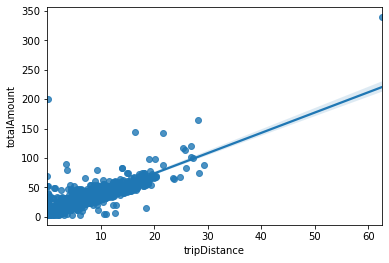

In [29]:
sns.regplot(x="tripDistance", y="totalAmount", data=df_new3)

There does seem to be a strong positive correlation. Let's see whether it's statistically significant by calculating the pvalue. 

In [30]:
from scipy import stats

In [31]:
pearson_coef, p_value = stats.pearsonr(df_new3['tripDistance'], df_new3['totalAmount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.9122014180426441  with a P-value of P = 0.0


The p-value is below 0.001 so this the relationship is statistically significant. tripDistance should be included in our model. 

Visualize some more relationships using box plot for categorial variables and regplot for continous.

<AxesSubplot:xlabel='passengerCount', ylabel='totalAmount'>

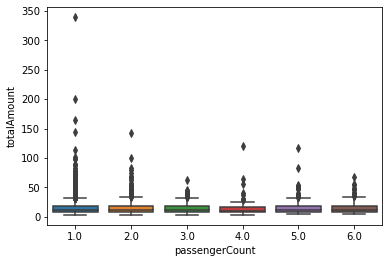

In [32]:
sns.boxplot(data = df_new3, x = 'passengerCount',y = 'totalAmount')

We see that the distributions of totalAmount between the different passengerCount categories have a significant overlap, and so passengerCount would not be a good predictor of totalAmount. Don't include in model. 

<AxesSubplot:xlabel='snowDepth', ylabel='totalAmount'>

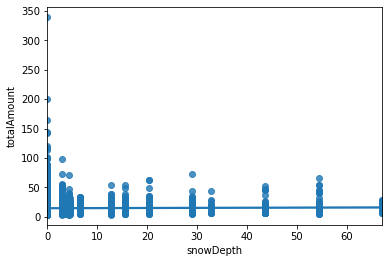

In [33]:
sns.regplot(x="snowDepth", y="totalAmount", data=df_new3)

In [34]:
pearson_coef, p_value = stats.pearsonr(df_new3['snowDepth'], df_new3['totalAmount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.012497841549406176  with a P-value of P = 0.1812798486192198


Correlation between snowDepth and totalAmount is very low and the relationship is not statistically significant because p > 0.1. Don't include in model.

<AxesSubplot:xlabel='precipDepth', ylabel='totalAmount'>

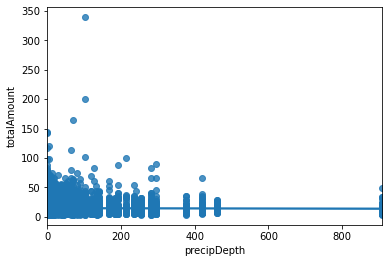

In [35]:
sns.regplot(x="precipDepth", y="totalAmount", data=df_new3)

In [36]:
pearson_coef, p_value = stats.pearsonr(df_new3['precipDepth'], df_new3['totalAmount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.009500140382113208  with a P-value of P = 0.30955294480335


Same as above, don't use precipDepth in model. 

<AxesSubplot:xlabel='temperature', ylabel='totalAmount'>

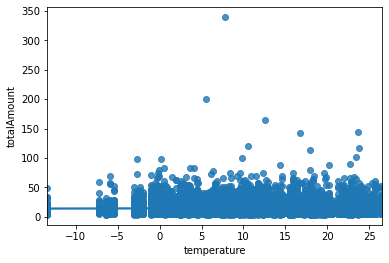

In [37]:
sns.regplot(x="temperature", y="totalAmount", data=df_new3)

In [38]:
pearson_coef, p_value = stats.pearsonr(df_new3['temperature'], df_new3['totalAmount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.02123362534309721  with a P-value of P = 0.023122143846799354


As above, low correlation with p value > 0.01. Don't use in model.

Use groupby to see if timeofday, month_num and day_of_week have any impact on totalAmount.

In [39]:
df_group_one=df_new3[['timeofday_1','timeofday_2', 'timeofday_3', 'timeofday_4','totalAmount']]

In [40]:
df_group_one=df_group_one.groupby(['timeofday_1','timeofday_2', 'timeofday_3', 'timeofday_4'],as_index= False).mean()
df_group_one

,timeofday_1,timeofday_2,timeofday_3,timeofday_4,totalAmount
0,0,0,0,1,14.011190
1,0,0,1,0,14.908014
2,0,1,0,0,15.755157
3,1,0,0,0,14.722760


There's not much difference between totalAmount except timeof_day2 (6-11am) is a bit more expensive. 

In [41]:
df_group_two=df_new3[['month_num_1','month_num_2','month_num_3','month_num_4','month_num_5','month_num_6','totalAmount']]

In [42]:
df_group_two=df_group_two.groupby(['month_num_1','month_num_2','month_num_3','month_num_4','month_num_5','month_num_6'],as_index= False).mean()
df_group_two

,month_num_1,month_num_2,month_num_3,month_num_4,month_num_5,month_num_6,totalAmount
0,0,0,0,0,0,1,14.881352
1,0,0,0,0,1,0,14.998479
2,0,0,0,1,0,0,14.736767
3,0,0,1,0,0,0,14.738555
4,0,1,0,0,0,0,14.026935
5,1,0,0,0,0,0,14.963968


Very little difference in the mean again except month 2 is a bit cheaper.

In [43]:
df_group_three=df_new3[['day_of_week_0','day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4','day_of_week_5','day_of_week_6','totalAmount']]

In [44]:
df_group_three=df_group_three.groupby(['day_of_week_0','day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4','day_of_week_5','day_of_week_6'],as_index= False).mean()
df_group_three

,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,totalAmount
0,0,0,0,0,0,0,1,14.785031
1,0,0,0,0,0,1,0,14.831993
2,0,0,0,0,1,0,0,14.751486
3,0,0,0,1,0,0,0,14.716336
4,0,0,1,0,0,0,0,15.039289
5,0,1,0,0,0,0,0,14.406237
6,1,0,0,0,0,0,0,14.525794


There's only about .50 difference between the means across all days. Don't include in model. 

Only tripDistance has a high correlation with totalAmount but it seems strange to only include one feature in a model. Let's try that and compare it to the result using other features.

In [45]:
df_final = df_new3[['tripDistance', 'totalAmount']]
df_final.head(5)

,tripDistance,totalAmount
0,9.40,44.30
1,14.75,44.80
2,3.35,18.96
3,3.33,16.30
4,0.47,5.30


In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [47]:
def train_test_rmse(feature_cols):
    X = df_final[feature_cols]
    y = df_final.totalAmount
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print(linreg.score(X_test,y_test))
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    

In [48]:
print(train_test_rmse(['tripDistance']))

0.8512005636407312
4.2144184474109085


The RMSE with only tripDistance included in the model is 4.21. The 0.85 figure means R² is 85%, meaning 85% of variance in totalAmount is explained by tripDistance.

To interpret the RMSE and decide whether the model is predicting well we can calculate the normalized RMSE based on the minimum and maximum values in totalAmount. Let's get a reminder of what those values are.

In [49]:
print(df_final['totalAmount'].min())
print(df_final['totalAmount'].max())

3.3
339.38


In [50]:
normalizedRMSE = 4.2144184474109085 / (339.38 - 3.3)
normalizedRMSE

0.01253992634911601

A normalized RMSE will return a value between 0 and 1. A value closer to 0 means the model is fitted well to the data.

Now let's try adding some random features to an alternative dataframe to see if it makes any difference to the RMSE.

In [51]:
df_alternative = df_new3[['tripDistance', 'temperature', 'snowDepth', 'precipDepth', 'timeofday_1','timeofday_2', 'timeofday_3', 'timeofday_4', 'totalAmount']]
df_alternative.head(5)

,tripDistance,temperature,snowDepth,precipDepth,timeofday_1,timeofday_2,timeofday_3,timeofday_4,totalAmount
0,9.40,6.185714,29.058824,3.0,0,0,1,0,44.30
1,14.75,4.571930,0.000000,0.0,0,0,1,0,44.80
2,3.35,4.384091,0.000000,0.0,0,0,0,1,18.96
3,3.33,6.185714,29.058824,3.0,0,0,0,1,16.30
4,0.47,3.846429,0.000000,0.0,0,0,1,0,5.30


In [52]:
def train_test_rmse_two(feature_cols):
    X = df_alternative[feature_cols]
    y = df_alternative.totalAmount
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [53]:
print(train_test_rmse_two(['tripDistance']))

4.2144184474109085


In [54]:
print(train_test_rmse_two(['tripDistance', 'temperature']))
print(train_test_rmse_two(['tripDistance', 'precipDepth']))
print(train_test_rmse_two(['tripDistance', 'timeofday_1','timeofday_2', 'timeofday_3', 'timeofday_4']))
print(train_test_rmse_two(['tripDistance', 'snowDepth','timeofday_1','timeofday_2', 'timeofday_3', 'timeofday_4']))
print(train_test_rmse_two(['tripDistance', 'precipDepth', 'temperature']))
print(train_test_rmse_two(['tripDistance', 'precipDepth', 'snowDepth']))
print(train_test_rmse_two(['tripDistance', 'precipDepth', 'snowDepth', 'timeofday_1','timeofday_2', 'timeofday_3', 'timeofday_4']))

4.213595361354371
4.213932563343711
4.187695440858472
4.188373672106137
4.2132966829849074
4.2153805302519185
4.187931140695602


There is very little difference in the RMSE no matter which features we choose. Calculating the normalized value for the highest and lowest RMSE would give similar results:

In [55]:
print(4.21538 / (339.38 - 3.3))
print(4.18769 / (339.38 - 3.3))

0.012542787431563913
0.012460396334206142
